# Notebook 3: Phase classification with neural networks

In this notebook, we are going to learn a more sophisticated methods to classify phases of matter. Specifically, we want to build models that are able to discover new physics without previous labelling. Specifically, we will learn 
[Learning by Confusion](https://doi.org/10.1038/nphys4037)

**Authors:** Kenny Choo, Mark H. Fischer, Eliska Greplova

Adaptation for Summer School: ML in Quantum Physics and Chemistry (24.08.-03.09.2021, Warsaw) by Anna Dawid (e.g., introduction to methods)

Adaptation for a Spring School on Theoretical and Computational Foundations of Quantum Technologies 2023 by Ilya Sinayskiy

In [1]:
# Tensorflow import
import tensorflow as tf
from tensorflow import keras

# Helper Libraries
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

print(tf.__version__)

2023-10-25 07:49:33.216510: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


2.14.0


## Learning by confusion

Learning by confusion is a ML scheme proposed by Evert van Nieuwenburg, Ye-Hua Liu, and Sebastian D. Huber in [this paper](https://doi.org/10.1038/nphys4037), where we use the supervised ML but avoid the need for labels. Ha! And you thought you knew what "supervised" meant![tekst linku](https://) 

## Step 1: Import data and analyze the data shape

The folder `Ising` contains Monte Carlo generated Ising configurations on the two-dimensional lattice. The data set is divided into training and test parts and corresponding label files containing the temperature, $T$, of each Monte Carlo sample.

### Ising Spin Configuration Classification

The Ising model is given by the (classical) Hamiltonian:

\begin{align}
H(\boldsymbol{\sigma}) = -\sum_{<ij>} \sigma_{i}\sigma_{j},
\end{align}
where the spins $\sigma_{i} \in \lbrace -1, 1 \rbrace$ are binary variables living on the vertices of a square lattice and the sum is taken over nearest neighbours $<ij>$. 
  
At a given temperature $\beta = 1/T$, the probability of a configuration $\sigma$ is given by the Boltzmann distribution
  
\begin{align}
  P(\boldsymbol{\sigma}) = \frac{e^{-\beta H(\boldsymbol{\sigma})}}{Z},
 \end{align}
  
  where $Z$ is the partition function. This model exhibits a phase transition from the ferromagnetic phase at low tempertures to a paramagnetic phase at high temperatures. The transition temperature is $T_c \approx 2.2692$.
  
  **Task**
 
1.   Classify the ferromagnetic versus the paramagnetic phase of the Ising model
2.   Find the transition temperature
  
**Dataset**: Monte Carlo generated configurations on a 30x30 square lattice. The configuration are labelled by temperature.



In [2]:
N = 30 # linear dimension of the lattice 

folder = "Ising_data"

ising_training_configs = np.load(folder + "/ising_training_configs_{0}x{0}.npy".format(N))
ising_training_labels = np.load(folder + "/ising_training_labels_{0}x{0}.npy".format(N))
ising_test_configs = np.load(folder + "/ising_test_configs_{0}x{0}.npy".format(N))
ising_test_labels = np.load(folder + "/ising_test_labels_{0}x{0}.npy".format(N))

print('train_images.shape =', ising_training_configs.shape)
print('train_labels.shape =', ising_training_labels.shape)
print('test_images.shape =', ising_test_configs.shape)
print('test_labels.shape =', ising_test_labels.shape)

train_images.shape = (1000, 30, 30)
train_labels.shape = (1000,)
test_images.shape = (1000, 30, 30)
test_labels.shape = (1000,)


## Step 2: Create many sets of training and test data with various critical temperature, $T_c$

e.g., try as many $T_c$ as you have test points.

## Step 3: Train $p$ DNNs on $p$ training sets and check their performance on $p$ test sets (created for different $T_c$)

e.g., try a DNN with one hidden layer of 32 neurons and Adam as an optimizer

(you can do Step 2 and 3 in one loop)

## Step 4: Plot the accuracies of $p$ trained DNNs vs. $T_c$ chosen to create their training and test sets

What do you see? What are advantages and disadvantages of the method?

In [5]:
Tp = list(set(ising_test_labels))
Tp.sort()
accuracies = []

train_images = ising_training_configs
test_images = ising_test_configs

for tp in Tp:
    # Label training set
    train_labels = []
    for i, label in enumerate(ising_training_labels):
        if label <= tp:
            train_labels.append(1)
        else:
            train_labels.append(0)
    train_labels = np.array(train_labels)
  
    # Label test set
    test_labels = []
    for i, label in enumerate(ising_test_labels):
        if label <= tp:
            test_labels.append(1)
        else:
            test_labels.append(0)
    test_labels = np.array(test_labels)
  
    # Define our model
    model = keras.Sequential([
        keras.layers.Flatten(input_shape=(30, 30)),
        keras.layers.Dense(32, activation=tf.nn.relu),
        keras.layers.Dense(2, activation=tf.nn.softmax)
    ])
  
    # Compile our model
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy']) 
  
    # Train
    model.fit(train_images, train_labels, epochs = 10, batch_size = 16, verbose=0)
  
    # Evaluate and save accuracy
    loss, acc = model.evaluate(test_images, test_labels, verbose=0)
    accuracies.append(acc)
  
    print("Tp = {:.2f}".format(tp))

Tp = 1.00
Tp = 1.13
Tp = 1.26
Tp = 1.39
Tp = 1.53
Tp = 1.66
Tp = 1.79
Tp = 1.92
Tp = 2.05
Tp = 2.18
Tp = 2.32
Tp = 2.45
Tp = 2.58
Tp = 2.71
Tp = 2.84
Tp = 2.97
Tp = 3.11
Tp = 3.24
Tp = 3.37
Tp = 3.50


Text(0.5, 0, 'Temp')

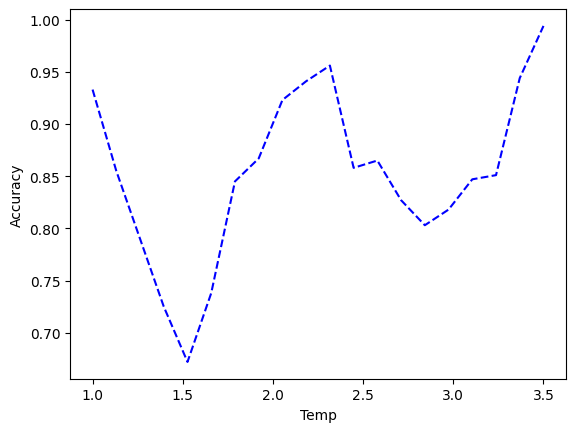

In [6]:
plt.plot(Tp, accuracies,'b--')
plt.ylabel('Accuracy')
plt.xlabel('Temp')